In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,\
recall_score,f1_score,plot_confusion_matrix, roc_curve, roc_auc_score

In [2]:
def RocCurve(fpr, tpr,col,lab):
    plt.plot(fpr, tpr, color=col, label=lab)

In [26]:
data=pd.read_excel(r'C:\Users\LENOVO\Desktop\Python\github\diabetes\dataset\archive\diabetes.xlsx')
print(data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
data=data.dropna();#if there is NaN values, the row will have been removed.
X=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [30]:
#SVM
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc.fit(X_train,y_train)
svc_ypred=svc.predict(X_test)

In [31]:
svc_cm=confusion_matrix(y_test,svc_ypred)
print("confusion matrix for svm:\n",svc_cm)

confusion matrix for svm:
 [[135  22]
 [ 37  37]]


In [32]:
svm_accuracy=accuracy_score(y_test,svc_ypred)
svm_precision=precision_score(y_test, svc_ypred,average='weighted')
svm_recall=recall_score(y_test,svc_ypred,average="weighted")
svm_f1score=f1_score(y_test,svc_ypred,average="weighted")
print("accuracy for svm:",svm_accuracy)
print("precision for svm:",svm_precision)
print("recall for svm:",svm_recall)
print("f1 score for svm:",svm_f1score)

accuracy for svm: 0.7445887445887446
precision for svm: 0.7343442590781968
recall for svm: 0.7445887445887446
f1 score for svm: 0.736008299278176


In [33]:
svc_yscore = svc.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, svc_yscore,pos_label=1)
svc_roc_auc_score=roc_auc_score(y_test, svc_yscore)
print('roc_auc_score for svm: ', svc_roc_auc_score)

roc_auc_score for svm:  0.80986400413152


In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_classifier=LogisticRegression(random_state=0,solver='liblinear')
logistic_classifier.fit(X_train,y_train)
logistic_ypred=logistic_classifier.predict(X_test)

In [35]:
logistic_cm=confusion_matrix(y_test,logistic_ypred)
print("confusion matrix for logistic regression:\n",logistic_cm)

confusion matrix for logistic regression:
 [[136  21]
 [ 31  43]]


In [36]:
logistic_accuracy=accuracy_score(y_test,logistic_ypred)
logistic_precision=precision_score(y_test, logistic_ypred,average='weighted')
logistic_recall=recall_score(y_test,logistic_ypred,average="weighted")
logistic_f1score=f1_score(y_test,logistic_ypred,average="weighted")
print("accuracy for logistic:",logistic_accuracy)
print("precision for logistic:",logistic_precision)
print("recall for logistic:",logistic_recall)
print("f1 score for logistic:",logistic_f1score)

accuracy for logistic: 0.7748917748917749
precision for logistic: 0.7687231057365788
recall for logistic: 0.7748917748917749
f1 score for logistic: 0.7702095721419393


In [37]:
#ROC curve for Logistic Regression
logistic_yscore = logistic_classifier.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, logistic_yscore,pos_label=1)
logistic_roc_auc_score=roc_auc_score(y_test, logistic_yscore)
print('roc_auc_score for Logistic Regression: ', logistic_roc_auc_score)

roc_auc_score for Logistic Regression:  0.8352556378034086


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

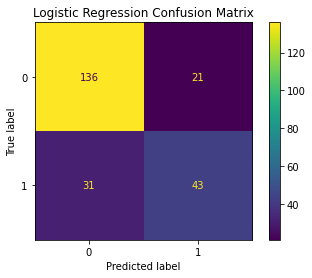

In [38]:
logistic_disp=plot_confusion_matrix(logistic_classifier, X_test, y_test)
logistic_disp.ax_.set_title("Logistic Regression Confusion Matrix")

Text(0.5, 1.0, 'SVM Confusion Matrix')

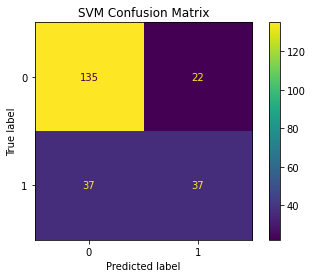

In [39]:
svc_disp=plot_confusion_matrix(svc, X_test, y_test)
svc_disp.ax_.set_title("SVM Confusion Matrix")

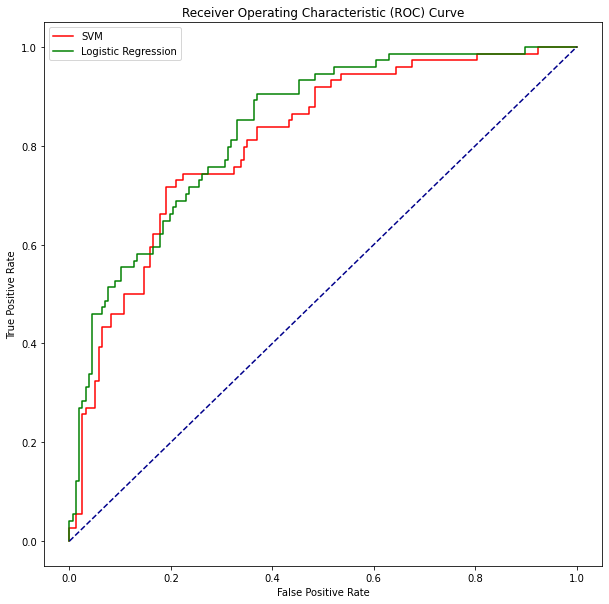

In [40]:
plt.subplots(1, figsize=(10,10))
RocCurve(false_positive_rate1, true_positive_rate1,'red','SVM')
RocCurve(false_positive_rate2, true_positive_rate2,'green','Logistic Regression')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

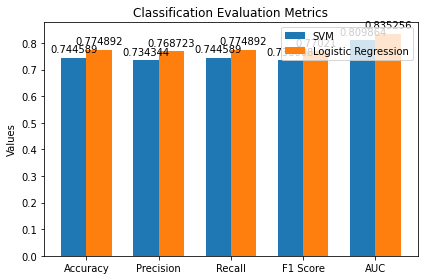

In [41]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
svc_values=[svm_accuracy,svm_precision,svm_recall,svm_f1score,svc_roc_auc_score]
logistic_values=[logistic_accuracy,logistic_precision,logistic_recall,logistic_f1score,logistic_roc_auc_score]
xlength = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(xlength - width/2, svc_values, width, label='SVM')
rects2 = ax.bar(xlength + width/2, logistic_values, width, label='Logistic Regression')
ax.set_ylabel('Values')
ax.set_title('Classification Evaluation Metrics')
ax.set_xticks(xlength)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()